In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

# Data Cleaning & Preprocessing

In [2]:
df = pd.read_csv("dataset/calories.csv")

# Explore Data

### Display first 5 rows

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Display dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### Summary statistics

In [5]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Check for missing values

In [6]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Check for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

### Check for outliers

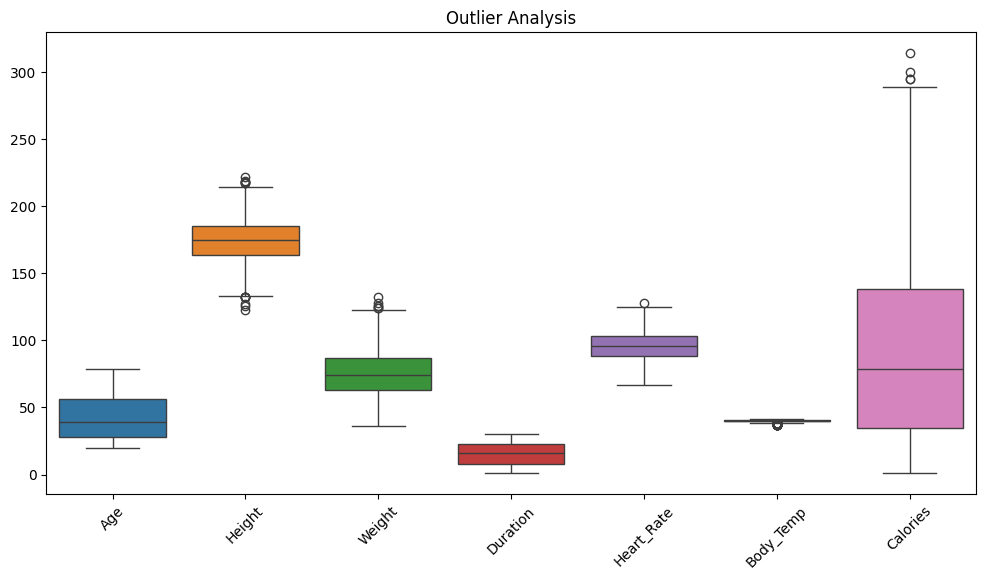

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])
plt.xticks(rotation=45)
plt.title('Outlier Analysis')
plt.show()

### Categorize Age and check distribution

In [9]:
def categorize_age(age):
    if age < 25:
        return "young"
    elif 25 <= age < 50:
        return "middle aged"
    else:
        return "senior"

df['Age Category'] = df['Age'].apply(categorize_age)

df['Age Category'].value_counts()

Age Category
middle aged    7561
senior         5104
young          2335
Name: count, dtype: int64

# Feature Engineering

### Features calculation

In [10]:
# BMI Calculation
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Calories per Minute
df['Calories per Minute'] = df['Calories'] / df['Duration']

# Calories per kg
df['Calories per kg'] = df['Calories'] / df['Weight']

# Heart Rate per Minute
df['Heart Rate per Minute'] = df['Heart_Rate'] / df['Duration']

# Intensity Score
df['Intensity Score'] = df['Heart_Rate'] * df['Duration'] / df['Weight']

# Temperature Deviation
df['Temp Deviation'] = df['Body_Temp'] - 36.6

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age Category,BMI,Calories per Minute,Calories per kg,Heart Rate per Minute,Intensity Score,Temp Deviation
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,senior,26.038781,7.965517,2.457447,3.620690,32.393617,4.2
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,young,21.773842,4.714286,1.100000,6.714286,21.933333,3.7
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,senior,24.655910,5.200000,0.329114,17.600000,5.569620,2.1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,middle aged,22.159109,5.461538,1.000000,7.692308,18.309859,3.9
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,middle aged,24.456063,3.500000,0.603448,8.100000,13.965517,3.2


### Categorize BMI and check distribution

In [11]:
def categorize_bmi(bmi):
    if bmi < 16:
        return "Severe underweight"
    elif 16 <= bmi < 17:
        return "Moderate underweight"
    elif 17 <= bmi < 18.5:
        return "Mild underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 35:
        return "Obesity Class I"
    elif 35 <= bmi < 40:
        return "Obesity Class II"
    else:
        return "Obesity Class III"

df['BMI Category'] = df['BMI'].apply(categorize_bmi)

df['BMI Category'].value_counts()

BMI Category
Normal weight    9792
Overweight       5208
Name: count, dtype: int64

# Exploratory Data Analysis

### Check calories distribution

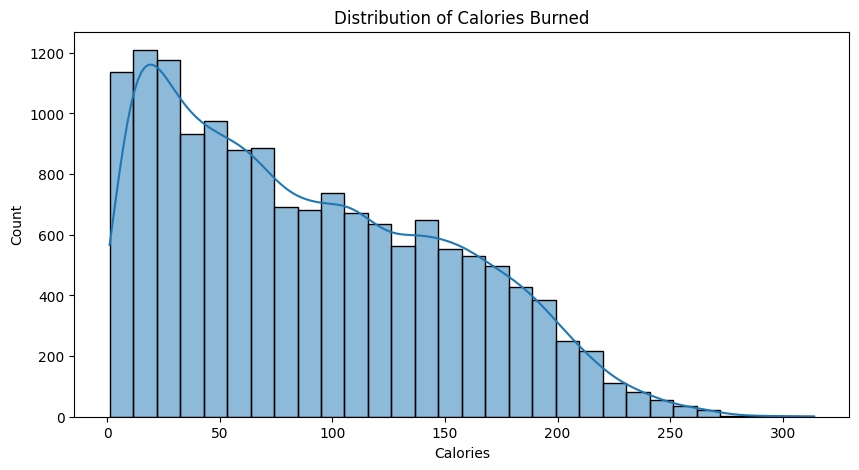

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title("Distribution of Calories Burned")
plt.show()

### Correlation Heatmap

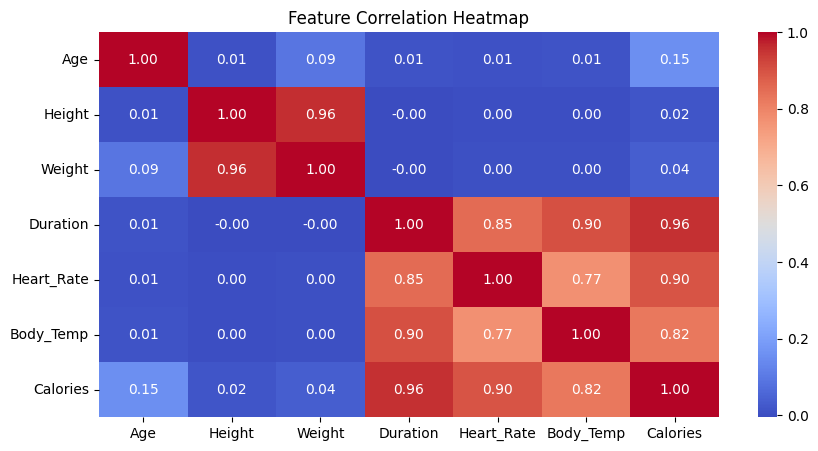

In [19]:
numeric_df=df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Checking BMI impact on calories burned

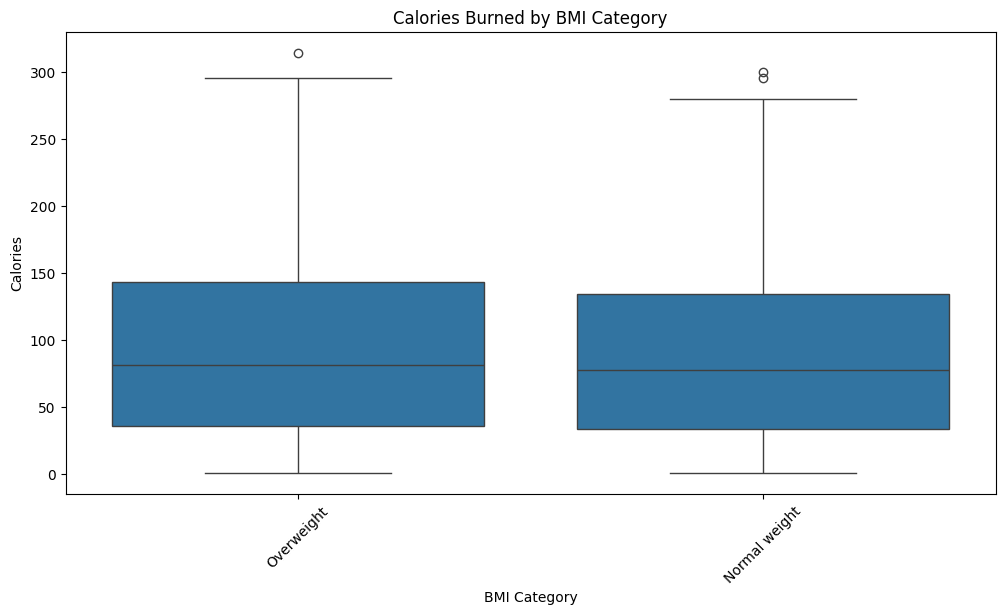

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['BMI Category'], y=df['Calories'])
plt.xticks(rotation=45)
plt.title("Calories Burned by BMI Category")
plt.show()

### Check relationship between exercise time and calories burned

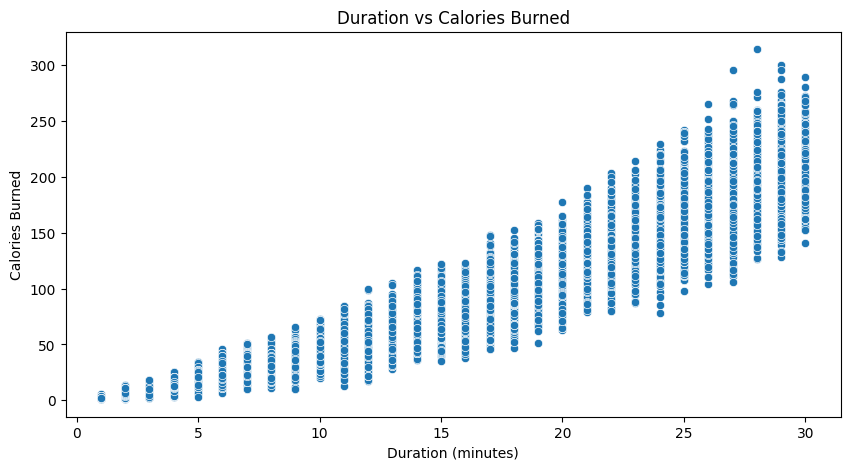

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Duration'], y=df['Calories'])
plt.title("Duration vs Calories Burned")
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burned")
plt.show()

### Average number of calories burned in different age categories

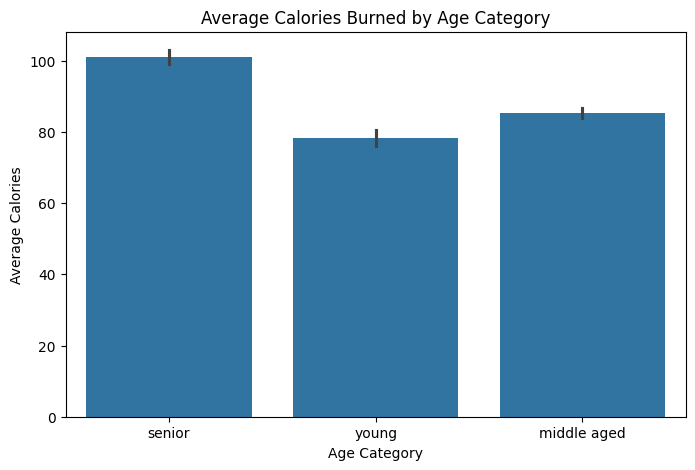

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Age Category'], y=df['Calories'], estimator=np.mean)
plt.title("Average Calories Burned by Age Category")
plt.ylabel("Average Calories")
plt.show()

### Check relationship between heart rate and calories burned

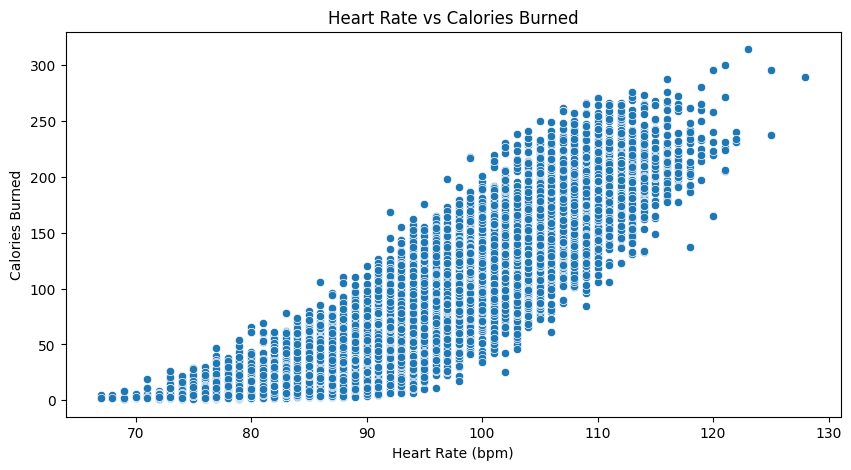

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Heart_Rate'], y=df['Calories'])
plt.title("Heart Rate vs Calories Burned")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Calories Burned")
plt.show()